In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns

In [2]:
#importing the data
df = pd.read_csv("Churn_Modelling.csv")

# Data Cleaning, Preprocessing and EDA

In [3]:
#Reading the first 5 rows
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
#Checking the shape of the dataset
df.shape

(10000, 14)

In [5]:
#Checking the information about the columns of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
#Checking the null values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

There is no null values in the dataset.

In [7]:
#Dropping RowNumber, CustomerId and Surname columns since these columns are not relevent for our analysis
df = df.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [8]:
#Converting categorical variable data type to category
df['Geography'] = df['Geography'].astype('category')
df['Gender'] = df['Gender'].astype('category')
df['NumOfProducts'] = df['NumOfProducts'].astype('category')
df['HasCrCard'] = df['HasCrCard'].astype('category')
df['IsActiveMember'] = df['IsActiveMember'].astype('category')
df['Exited'] = df['Exited'].astype('category')

Checking the distribution on Categorical variable

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64


C:\Users\dell1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Geography'>

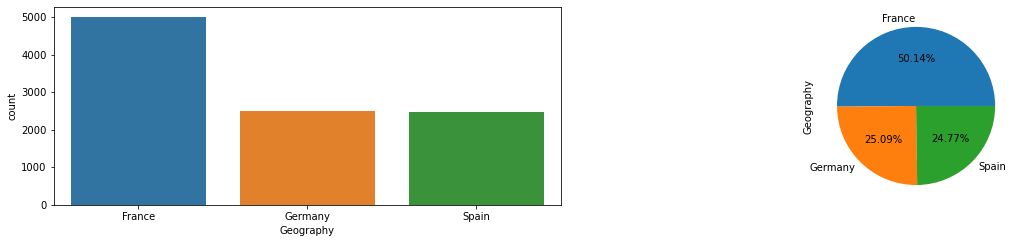

In [9]:
#Checking the distribution of geography
plt.figure(figsize=(20,8))
print(df['Geography'].value_counts())
plt.subplot(2,2,1)
sns.countplot(df['Geography'])
plt.subplot(2,2,2)
df['Geography'].value_counts().plot(kind='pie',autopct='%.2f%%')

Male      5457
Female    4543
Name: Gender, dtype: int64


C:\Users\dell1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Gender'>

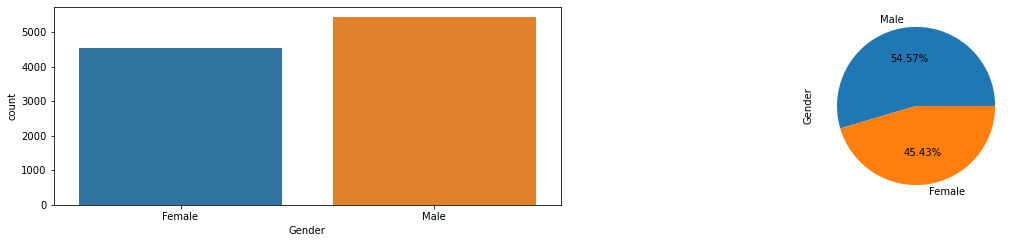

In [10]:
#Checking the distribution of gender
plt.figure(figsize=(20,8))
print(df['Gender'].value_counts())
plt.subplot(2,2,1)
sns.countplot(df['Gender'])
plt.subplot(2,2,2)
df['Gender'].value_counts().plot(kind='pie',autopct='%.2f%%')

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64


C:\Users\dell1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='NumOfProducts'>

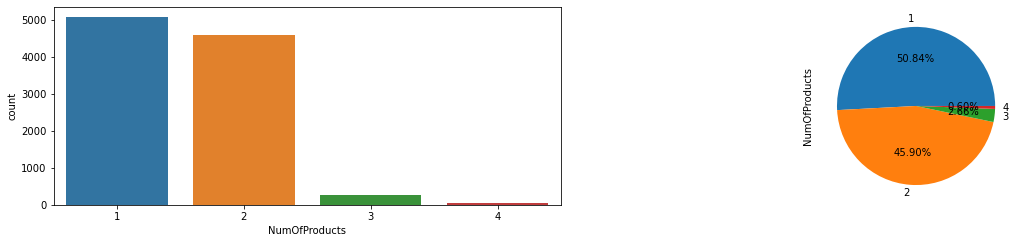

In [11]:
#Checking the distribution of Numofproducts
plt.figure(figsize=(20,8))
print(df['NumOfProducts'].value_counts())
plt.subplot(2,2,1)
sns.countplot(df['NumOfProducts'])
plt.subplot(2,2,2)
df['NumOfProducts'].value_counts().plot(kind='pie',autopct='%.2f%%')

1    7055
0    2945
Name: HasCrCard, dtype: int64


C:\Users\dell1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='HasCrCard'>

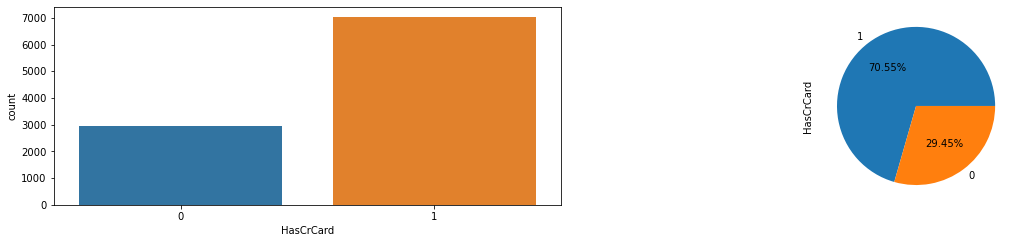

In [12]:
#Checking the distribution of HasCrCard
plt.figure(figsize=(20,8))
print(df['HasCrCard'].value_counts())
plt.subplot(2,2,1)
sns.countplot(df['HasCrCard'])
plt.subplot(2,2,2)
df['HasCrCard'].value_counts().plot(kind='pie',autopct='%.2f%%')

1    5151
0    4849
Name: IsActiveMember, dtype: int64


C:\Users\dell1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='IsActiveMember'>

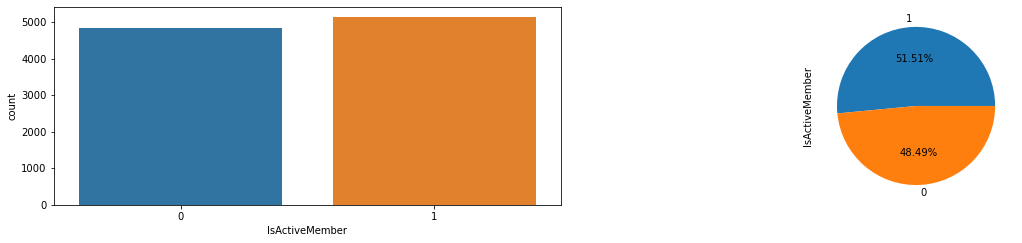

In [13]:
#Checking the distribution of Isactivemember
plt.figure(figsize=(20,8))
print(df['IsActiveMember'].value_counts())
plt.subplot(2,2,1)
sns.countplot(df['IsActiveMember'])
plt.subplot(2,2,2)
df['IsActiveMember'].value_counts().plot(kind='pie',autopct='%.2f%%')

0    7963
1    2037
Name: Exited, dtype: int64


C:\Users\dell1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Exited'>

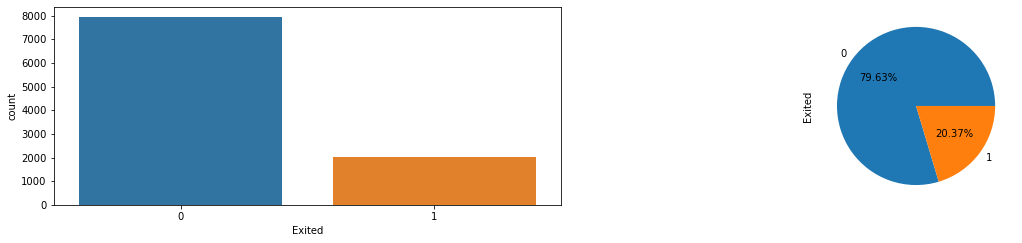

In [14]:
#Checking the distribution of Exited
plt.figure(figsize=(20,8))
print(df['Exited'].value_counts())
plt.subplot(2,2,1)
sns.countplot(df['Exited'])
plt.subplot(2,2,2)
df['Exited'].value_counts().plot(kind='pie',autopct='%.2f%%')

In [15]:
#Checking the 5 points summary of continuous variable
df.describe()

,CreditScore,Age,Tenure,Balance,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,100090.239881
std,96.653299,10.487806,2.892174,62397.405202,57510.492818
min,350.000000,18.000000,0.000000,0.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,199992.480000


In [16]:
#Plotting the distribution of continuous variable
def dist(df):
    
    #isolate the categorical variable names
    cols = []
    for col in df.columns:
        if ((df[col].dtype.name) == 'int64') or ((df[col].dtype.name) == 'float64'):
            cols.append(col)
        
    plt.figure(figsize=(20, 25))
    plt.suptitle("Distribution plot for Continuous Variables in the dataframe", fontsize=18, y=0.95)
    
    # number of columns
    ncols = 3
    # calculate number of rows
    nrows = (len(cols) // ncols)+1
    
    # loop through the length of 'b' and keep track of index
    for n, col in zip(np.arange(len(cols)),cols):
        ax = plt.subplot(nrows, ncols, n+1)
        sns.histplot(df[col],ax=ax,kde=True)  
        ax.set_title(col.upper())
    plt.show()

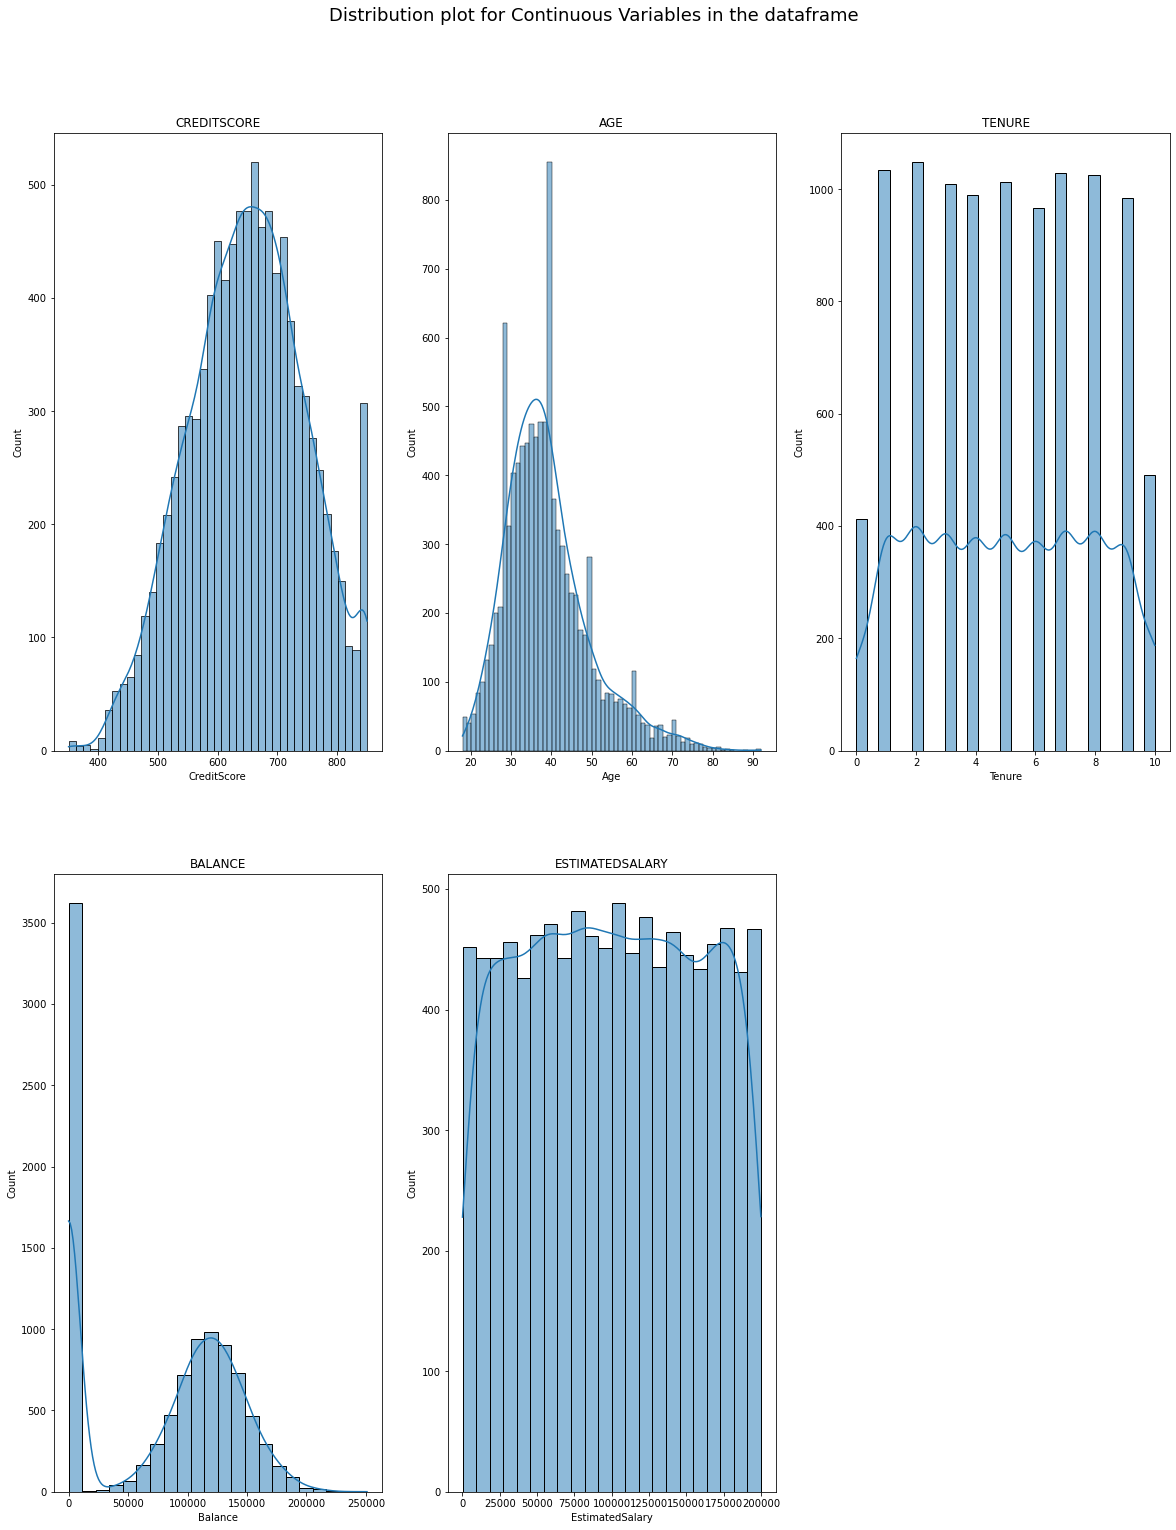

In [17]:
dist(df)

<AxesSubplot:>

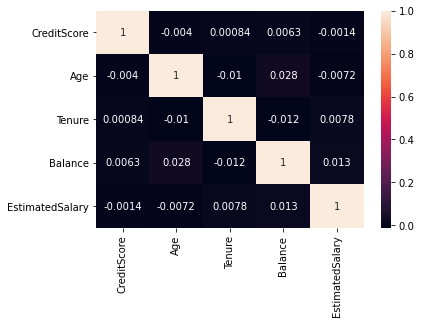

In [18]:
#Correlation between continuous variable
sns.heatmap(df.corr(),annot=True)

There is a very weak relationship between the categorical variable.

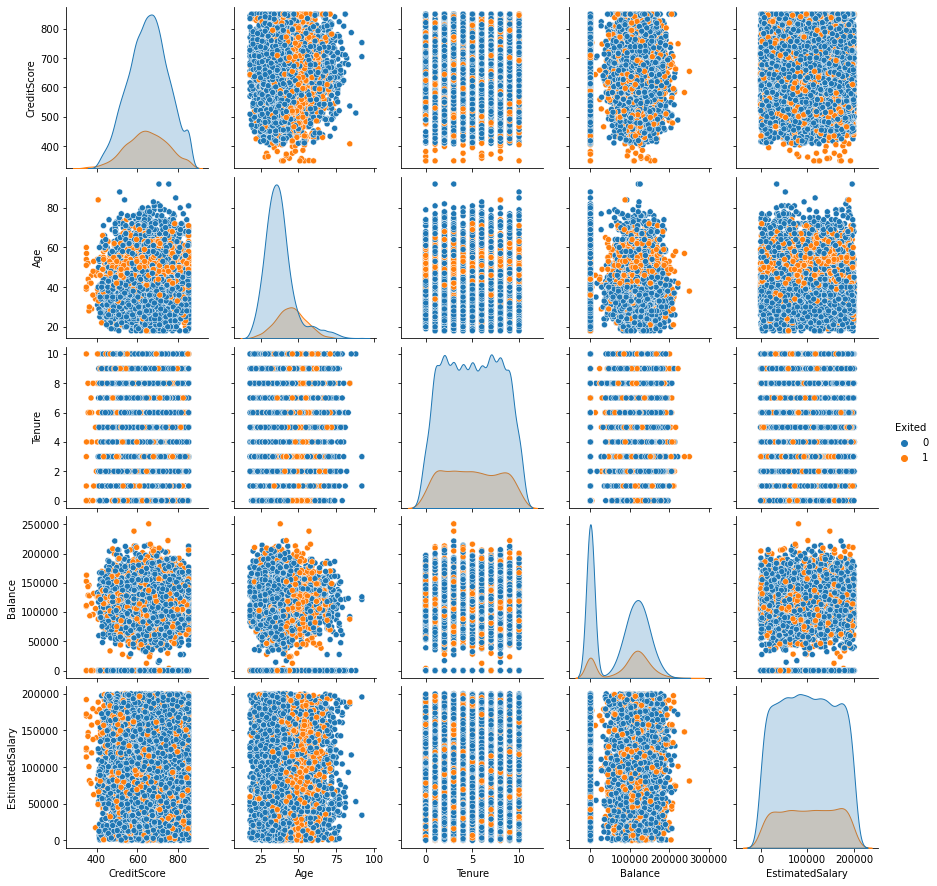

In [19]:
#Pairplot for continuous variable
sns.pairplot(df,hue='Exited')

In [20]:
from scipy.stats import chi2_contingency

In [21]:
#Chi Square Test for Categorical variable
def chi(df):
    for col in df.columns[:-1]:
        if df[col].dtype.name == 'category':
            crstab = pd.crosstab(df[col],df['Exited'])
            chi2, p, dof, expected =chi2_contingency(crstab)
            if p >0.05:
                print('For',col,',chi2=',chi2,'and p=',p,',since p>0.05, there is no relationship between',col,'and Exited.')
            else:
                print('For',col,',chi2=',chi2,'and p=',p,',since p<0.05, there is a relationship between',col,'and Exited.')

In [22]:
chi(df)

For Geography ,chi2= 301.25533682434536 and p= 3.8303176053541544e-66 ,since p<0.05, there is a relationship between Geography and Exited.
For Gender ,chi2= 112.91857062096116 and p= 2.2482100097131755e-26 ,since p<0.05, there is a relationship between Gender and Exited.
For NumOfProducts ,chi2= 1503.6293615070408 and p= 0.0 ,since p<0.05, there is a relationship between NumOfProducts and Exited.
For HasCrCard ,chi2= 0.47133779904440803 and p= 0.49237236141554686 ,since p>0.05, there is no relationship between HasCrCard and Exited.
For IsActiveMember ,chi2= 242.98534164287963 and p= 8.785858269303703e-55 ,since p<0.05, there is a relationship between IsActiveMember and Exited.


In [23]:
#Dropping the HasCrCard column
df = df.drop("HasCrCard",axis=1)

In [24]:
#Independent t test
from scipy.stats import ttest_ind
col = df.select_dtypes(['float64','int64']).columns
for c in col:
    x = np.array(df[c][df['Exited']==1])
    y = np.array(df[c][df['Exited']==0])
    t, p_value = ttest_ind(x,y,axis=0)
    print('p_value:',p_value)
    if p_value < 0.05:          #assuming significant level at 0.05
        print('There is a significant difference in',c, 'feature with different category of churn')
    else:
        print('There is no significant difference in',c, 'feature with different category of churn')

p_value: 0.006738213892192373
There is a significant difference in CreditScore feature with different category of churn
p_value: 1.2399313093427738e-186
There is a significant difference in Age feature with different category of churn
p_value: 0.16152684949473256
There is no significant difference in Tenure feature with different category of churn
p_value: 1.2755633191525477e-32
There is a significant difference in Balance feature with different category of churn
p_value: 0.22644042802223346
There is no significant difference in EstimatedSalary feature with different category of churn


In [25]:
#Dropping the HasCrCard column
df = df.drop(['Tenure','EstimatedSalary'],axis=1)

<AxesSubplot:>

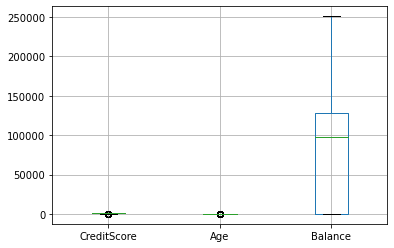

In [26]:
df.boxplot()

In [27]:
#Calculating the number of outliers in each categorical variable
des=df.describe()
for col,i in zip(des.columns,np.arange(len(des.columns))):
    q1 = des.iloc[4, i]
    q3 = des.iloc[6, i]
    iqr = q3 - q1
    up = q3 + (1.5*iqr)
    low = q1 - (1.5*iqr)
    outlier = len(df[col][(df[col]>up) | (df[col]<low)])
    print('Number of outlier before treatment in',col,'is: ',outlier)
    df_include = df[col][(df[col] > low) & (df[col] < up)]
    median = df_include.median()
    df[col] = np.where(df[col]>up,median,df[col])
    df[col] = np.where(df[col] < low, median, df[col])
    outlier = len(df[col][(df[col]>up) | (df[col]<low)])
    print('Number of outlier after treatment in',col,'is: ',outlier)

Number of outlier before treatment in CreditScore is:  15
Number of outlier after treatment in CreditScore is:  0
Number of outlier before treatment in Age is:  359
Number of outlier after treatment in Age is:  0
Number of outlier before treatment in Balance is:  0
Number of outlier after treatment in Balance is:  0


# Data Preparation

In [28]:
#Label encoder for gender column
replace = {'Male':0,'Female':1}
df['Gender'] = df['Gender'].replace(replace)

In [29]:
#One hot Encoding for Geography and NumofProducts column
df = pd.get_dummies(df,columns=['Geography','NumOfProducts'])

In [30]:
#Splitiing the data into x and y
x = df.drop('Exited', axis=1)
y = df['Exited']

In [31]:
#Splitting the data into training and testing set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=1)

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
#Scaling the data
scl = StandardScaler()

In [34]:
x_train_scaled = scl.fit_transform(x_train)
x_test_scaled = scl.transform(x_test)

# Model Building

In [35]:
import tensorflow as tf

In [36]:
tf.__version__

'2.7.0'

Building the ANN


In [43]:
#Initialize the ANN
ann = tf.keras.models.Sequential()

In [44]:
#Adding input layer and the first hidden layer
ann.add(tf.keras.layers.Dense(units=6,activation = 'relu'))

In [45]:
#Adding the 2nd hidden layer
ann.add(tf.keras.layers.Dense(units=6,activation = 'relu'))

In [46]:
#Adding the output layer
ann.add(tf.keras.layers.Dense(units=1,activation = 'sigmoid'))

Training the ANN

In [47]:
#Compiling the ANN
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['Accuracy','Precision','Recall'])

In [48]:
#Training the ANN on training set
ann.fit(x_train_scaled,y_train,batch_size=100,epochs=100)

Epoch 1/100
75/75 [==============================] - 1s 2ms/step - loss: 0.7040 - Accuracy: 0.5808 - precision: 0.2580 - recall: 0.5715
Epoch 2/100
75/75 [==============================] - 0s 2ms/step - loss: 0.5823 - Accuracy: 0.7973 - precision: 0.4973 - recall: 0.1793
Epoch 3/100
75/75 [==============================] - 0s 2ms/step - loss: 0.5090 - Accuracy: 0.8108 - precision: 0.8828 - recall: 0.0745
Epoch 4/100
75/75 [==============================] - 0s 2ms/step - loss: 0.4615 - Accuracy: 0.8145 - precision: 0.8841 - recall: 0.0956
Epoch 5/100
75/75 [==============================] - 0s 1ms/step - loss: 0.4328 - Accuracy: 0.8209 - precision: 0.7862 - recall: 0.1575
Epoch 6/100
75/75 [==============================] - 0s 2ms/step - loss: 0.4118 - Accuracy: 0.8300 - precision: 0.7542 - recall: 0.2367
Epoch 7/100
75/75 [==============================] - 0s 2ms/step - loss: 0.3967 - Accuracy: 0.8360 - precision: 0.7059 - recall: 0.3243
Epoch 8/100
75/75 [=============================

75/75 [==============================] - 0s 1ms/step - loss: 0.3471 - Accuracy: 0.8540 - precision: 0.7259 - recall: 0.4469
Epoch 61/100
75/75 [==============================] - 0s 2ms/step - loss: 0.3470 - Accuracy: 0.8547 - precision: 0.7288 - recall: 0.4483
Epoch 62/100
75/75 [==============================] - 0s 2ms/step - loss: 0.3467 - Accuracy: 0.8549 - precision: 0.7365 - recall: 0.4403
Epoch 63/100
75/75 [==============================] - 0s 3ms/step - loss: 0.3467 - Accuracy: 0.8548 - precision: 0.7362 - recall: 0.4397
Epoch 64/100
75/75 [==============================] - 0s 2ms/step - loss: 0.3466 - Accuracy: 0.8533 - precision: 0.7240 - recall: 0.4443
Epoch 65/100
75/75 [==============================] - 0s 2ms/step - loss: 0.3466 - Accuracy: 0.8544 - precision: 0.7353 - recall: 0.4377
Epoch 66/100
75/75 [==============================] - 0s 2ms/step - loss: 0.3464 - Accuracy: 0.8548 - precision: 0.7383 - recall: 0.4370
Epoch 67/100
75/75 [==============================] - 

In [51]:
y_test_pred =ann.predict(x_test_scaled)

In [52]:
y_test_pred = y_test_pred > 0.5
y_test_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [False]])

In [53]:
from sklearn.metrics import confusion_matrix, classification_report

<AxesSubplot:>

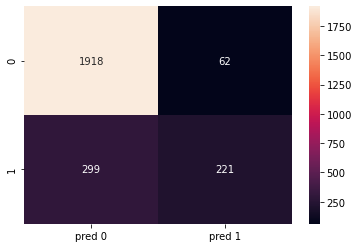

In [54]:
#Printing the confusion matrix testing set
cm = pd.DataFrame(confusion_matrix(y_test,y_test_pred),columns=['pred 0','pred 1'])
sns.heatmap(cm,annot=True,fmt='g')

In [55]:
#Printing the classification report for testing
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.91      1980
           1       0.78      0.42      0.55       520

    accuracy                           0.86      2500
   macro avg       0.82      0.70      0.73      2500
weighted avg       0.85      0.86      0.84      2500



* We can see that accuracy of the model 86%

In [56]:
y_train_pred = ann.predict(x_train_scaled)

In [57]:
y_train_pred = y_train_pred > 0.5
y_train_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [ True]])

<AxesSubplot:>

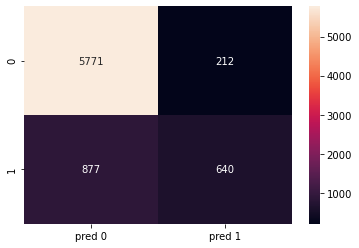

In [58]:
#Printing the confusion matrix for training
cm = pd.DataFrame(confusion_matrix(y_train,y_train_pred),columns=['pred 0','pred 1'])
sns.heatmap(cm,annot=True,fmt='g')

In [59]:
#Printing the classification report for training set
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      5983
           1       0.75      0.42      0.54      1517

    accuracy                           0.85      7500
   macro avg       0.81      0.69      0.73      7500
weighted avg       0.84      0.85      0.84      7500



* Training and testing accuracy of the model is almost same, so we can go ahead with the model.

In [60]:
#Saving the model
ann.save('ann.hdf5')

In [61]:
#Loading the model
loaded_model = tf.keras.models.load_model('C:/Users/dell1/Churn Prediction using ANN/ann.hdf5')

In [62]:
a = np.asarray(x_test.values[0]).reshape(1,-1)

In [63]:
loaded_model.predict(a)>0.5

array([[False]])

In [64]:
#saving the scale model
import pickle
filename = 'trained_model_scaled.sav'
pickle.dump(scl,open(filename,'wb'))

In [65]:
#Loading the scaled model
loaded_model_scaled = pickle.load(open('trained_model_scaled.sav','rb'))